The purpose of this notebook is to show how to **read** some research data in python.

For example,

*   *Ni-foil-XAS-data-from-ISS-beamline.dat* is an X-ray absorption spectroscopy data from ISS beamline of NSLS-II
*   *Ni-foil-XAS-data-from-QAS-beamline.dat* is an X-ray absorption spectroscopy data from QAS beamline of NSLS-II
*   *Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi* is X-ray diffraction data from XPD beamline of NSLS-II
*   *25KI-LiCl-KCl_25oC.xlsx* is excel file from a benchtop XRD equipment
*   topas.inp is an input file for TOPAS XRD refinement program and topas.out is an output file from TOPAS.
*   bde401ed-ac56-45cd-b0c5_000000.h5 is an hdf file from X-ray fluoresence detector at XPD beamline of NSLS-II
...

It should be noted that the purpose of this notebook is NOT to make pretty figures. Instead to show how to read
these files with Python....




# general imports

In [4]:
# We need to import some Python libraries here first.

import os
import sys
import shutil
import scipy

import numpy as np
import xarray as xr

In [5]:
# It would be good to have interactive plots if ipympl is installed.
# See: https://matplotlib.org/ipympl/

try:
    %matplotlib inline
except:
    %matplotlib widget

# importing matplotlib for plots.
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.constrained_layout.use'] = True

# setting up the example data path

In [7]:
# We assume this notebook and its data is on Google Drive so that we can use Google Colab.
# Otherwise, replace example_data_path with the path the notebook and its data folder are stored on

try:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('/content/drive/MyDrive/SULI-2024/repositories/pySULI/notebooks/')
except:
    pass

In [8]:
# Assuming notebook and data folder are here.

here = os.getcwd()
example_data_path = 'example_data/tutorial/file_types/'

os.listdir('%s/%s'%(here,example_data_path))

['xls', 'plain_text', 'hdf', 'image', 'netcdf', 'yaml', 'npy']

# reading plain text files (txt, dat..)

In [10]:
# navigate into plain_text directory
os.chdir('%s/%s/%s'%(here,example_data_path,'plain_text'))

# list the contents of directory
os.listdir()

['topas.xy',
 'topas.inp',
 'topas.out',
 'topas_modified.inp',
 'Ni-foil-XAS-data-from-ISS-beamline.dat',
 'topas.dat',
 'Ni-foil-XAS-data-from-QAS-beamline.dat',
 'Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi',
 'two-column-data.txt']

\



`two-column-data.txt` here is a simple two-column text file.
For someone who doesn't know python, it can be imported into excel

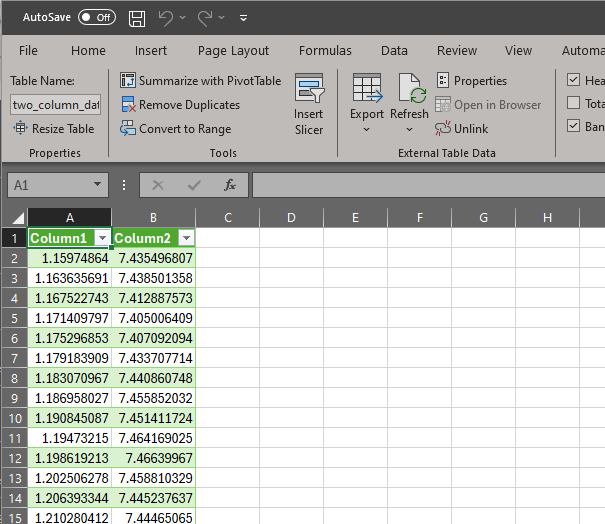

But this is very inefficient and we want "python" way of reading this file.

\

In Python, it is only 3-lines of code to read and plot the contents of this file.

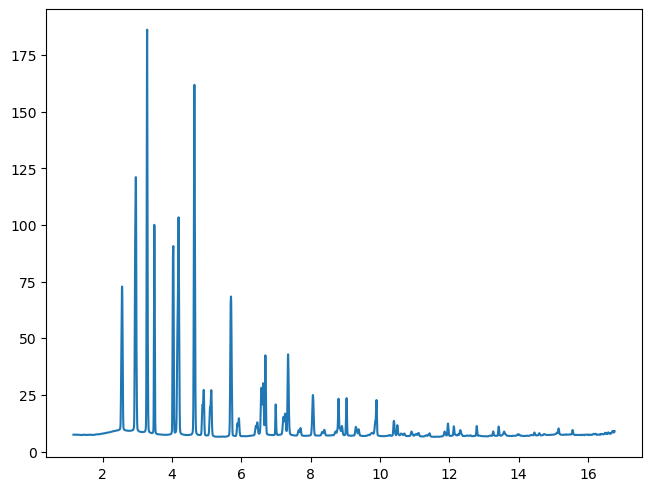

In [13]:
data = np.loadtxt('two-column-data.txt',unpack=True)
plt.figure()
plt.plot(data[0],data[1]);

In [14]:
# but same lines will not work for Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi file that has some extra lines at the beginning.

try:
    data = np.loadtxt('Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi',unpack=True)
    plt.figure()
    plt.plot(data[0],data[1])
except Exception as exc:
    print(exc)


could not convert string '/nsls2/xf28id2/xpdUser/tiff_base/Ni_calib/integration/Ni_calib_20190301-150927_459ff6_0001_mean_tth to float64 at row 0, column 1.


In [15]:
# On Google Colab, you can use `head` linux command to see the first 10 lines of the file.
! head -n 10 Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi

/nsls2/xf28id2/xpdUser/tiff_base/Ni_calib/integration/Ni_calib_20190301-150927_459ff6_0001_mean_tth
        This file contains integrated powder x-ray diffraction
        intensities.
        First column represents two theta values (degrees) and
        second column represents intensities and if there is
        a third column it represents the error values of intensities.
        Number of data points in the file : 3115
        ######################################################
7.483904475406880953e-03 6.011987304687499645e+00
1.406578056178594757e-02 7.987988471984863281e+00


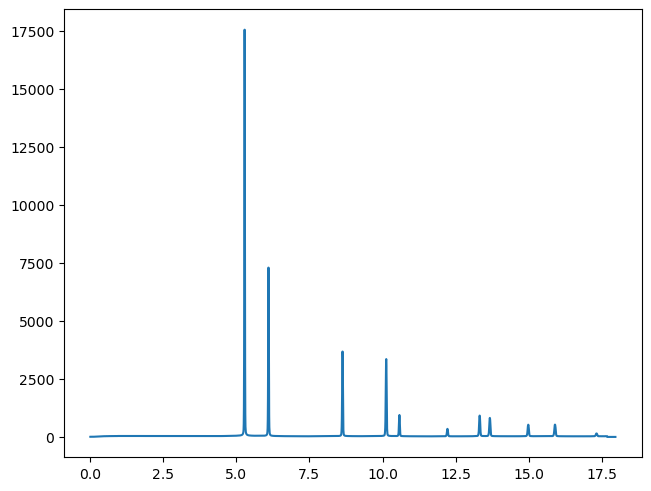

In [16]:
# We need to use "skiprows" keyword in np.loadtxt function to exclude the first 7 lines
data = np.loadtxt('Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi',unpack=True,skiprows=7)
plt.figure()
plt.plot(data[0],data[1]);

\
Now we want to read *Ni-foil-XAS-data-from-ISS-beamline.dat* file here

\

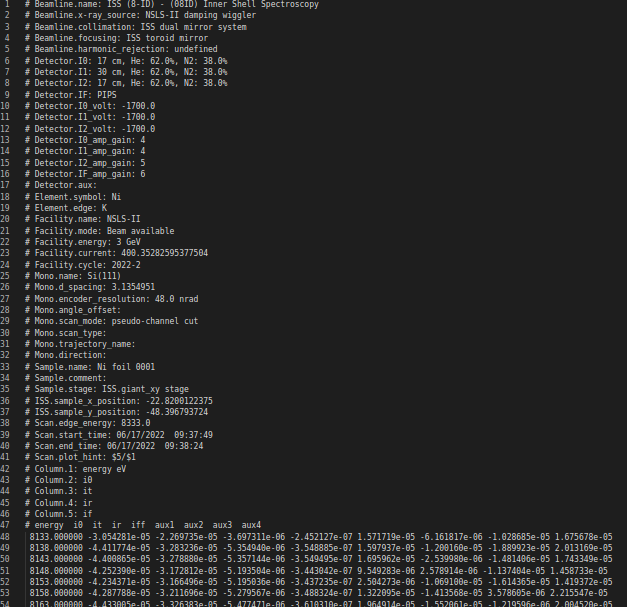

\

From the header lines, we can see first column is energy, the other columns are i0, it (transmission), ir (reference), iff (fluoresence) channels.



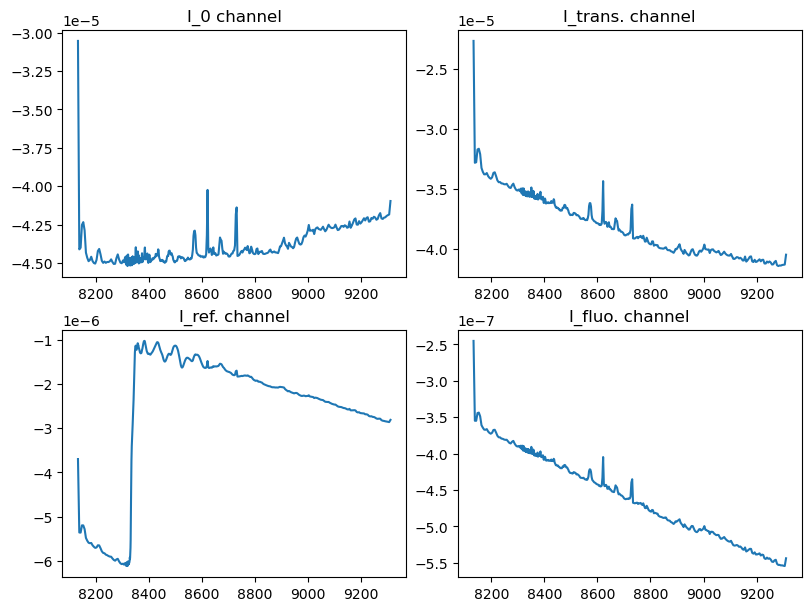

In [18]:
# we can load the file and plot i0, it (transmission), ir (reference), iff (fluoresence) channels like this:

E, I0, It, Ir, If = np.loadtxt('Ni-foil-XAS-data-from-ISS-beamline.dat',unpack=True,usecols=[0,1,2,3,4])

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(2,2,1)
ax.plot(E,I0)
ax.set_title('I_0 channel')

ax = fig.add_subplot(2,2,2)
ax.plot(E,It)
ax.set_title('I_trans. channel')

ax = fig.add_subplot(2,2,3)
ax.plot(E,Ir)
ax.set_title('I_ref. channel')

ax = fig.add_subplot(2,2,4)
ax.plot(E,If)
ax.set_title('I_fluo. channel');

\
For XAS theory you can check Bruce Ravel's NSLS-II lecture slides [here](https://www.bnl.gov/nsls2/userguide/lectures/lecture-4-ravel.pdf)

slide 16/63 notes:

Transmission XAS is defines as:  $\mu(E)$ = ln(I$_0$/I$_t$)

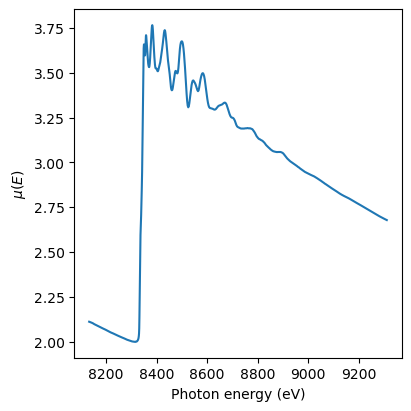

In [20]:
# Therefore, we can easily plot mu(E) for reference channel as below:

E, I0, It, Ir, If = np.loadtxt('Ni-foil-XAS-data-from-ISS-beamline.dat',unpack=True,usecols=[0,1,2,3,4])

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(E,np.log(I0/Ir))
ax.set_ylabel('$\mu(E)$')
ax.set_xlabel('Photon energy (eV)');

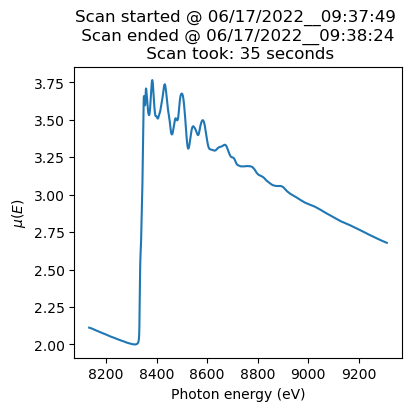

In [21]:
# Sometimes, we may be interested in showing some of the information in the header of the file in the plot.
# For example, the scan of file Ni-foil-XAS-data-from-ISS-beamline.dat started @ 06/17/2022  09:37:49
# and it ended @ 06/17/2022  09:38:24. Therefore, the scan took 34 seconds. We can include these info
# at the title of the plot as below.


fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(E,np.log(I0/Ir))
ax.set_ylabel('$\mu(E)$')
ax.set_xlabel('Photon energy (eV)')
ax.set_title('Scan started @ 06/17/2022__09:37:49 \n Scan ended @ 06/17/2022__09:38:24 \n Scan took: 35 seconds');

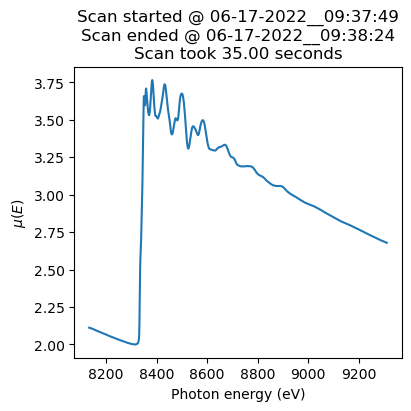

In [22]:
# instead of entering title string manually, we can do it with python was as below.
# But we need to write a function that will read the dat file and extract time info.
# For one file, this is not very important. But if we have hundreds of dat files,
# it is inevitable to do it the python way..


def get_title_str(datfile):
    import datetime
    with open(datfile) as datfile:
        lines = datfile.readlines()
        for e,line in enumerate(lines):
            if line.startswith('# Scan.start_time:'):
                dt_start = datetime.datetime.strptime("%s_%s"%(line.split()[2], line.split()[3]), "%m/%d/%Y_%H:%M:%S")
            elif line.startswith('# Scan.end_time:'):
                dt_stop = datetime.datetime.strptime("%s_%s"%(line.split()[2], line.split()[3]), "%m/%d/%Y_%H:%M:%S")
            elif line.startswith('# Start time:'):
                dt_start = datetime.datetime.strptime("%s_%s"%(line.split()[3], line.split()[4]), "%m/%d/%Y_%H:%M:%S")
            elif line.startswith('# Stop time:'):
                dt_stop = datetime.datetime.strptime("%s_%s"%(line.split()[3], line.split()[4]), "%m/%d/%Y_%H:%M:%S")

    title_str = '%s\n%s\nScan took %.2f seconds'%(
        dt_start.strftime("Scan started @ %m-%d-%Y__%H:%M:%S"),
        dt_stop.strftime("Scan ended @ %m-%d-%Y__%H:%M:%S"),
        (dt_stop.timestamp()-dt_start.timestamp()))

    return title_str


fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(E,np.log(I0/Ir))
ax.set_ylabel('$\mu(E)$')
ax.set_xlabel('Photon energy (eV)')

ax.set_title(get_title_str('Ni-foil-XAS-data-from-ISS-beamline.dat'));

In [23]:
# there is a topas.inp file in plain_text folder. It is used as input file for TOPAS 
# program (https://topas.webspace.durham.ac.uk/) which does the XRD refinement. 
# This example illustrates how to find a value in a text file and replace it 
# with a new value. Then we use a difflib to compare differences between two files.


# import regular expression library
import re

with open('topas.inp', 'r') as file:
    contents = file.read()

    # regex expression to search for a number as xxx.xxxx
    pattern = r'Cubic\((\d+\.\d+)\)'

    # grab the number out, and reformat it to 0.001 precision
    newvalue = format(float(re.findall(pattern, contents)[0]), ".3f")

    # create replacement string using reformatted number, and replace
    replacement = 'Cubic(' + str(newvalue) + ')'
    modified_contents = re.sub(pattern, replacement, contents)

    with open('topas_modified.inp', 'w') as newfile:
        newfile.write(modified_contents)


# import library for sequence comparisons
import difflib

with open('topas.inp') as ogfile: 
    og_text = ogfile.readlines() 
  
with open('topas_modified.inp') as newfile: 
    new_text = newfile.readlines() 
  
# output the difference between topas.inp and topas_modified.inp
for line in difflib.unified_diff( 
        og_text, new_text, fromfile='topas.inp',  
        tofile='topas_modified.inp', lineterm=''): 
    print(line) 

--- topas.inp
+++ topas_modified.inp
@@ -30,7 +30,7 @@
 		}

 

 		scale @  0.0253272279`_3.944e-005

-		Cubic(4.156826)

+		Cubic(4.157)

 		

 Out_X_Yobs_Ycalc_and_Difference("topas.dat")

 C_matrix_normalized



# reading xls files into python

In [25]:
# navigate into xls directory
os.chdir('%s/%s/%s'%(here,example_data_path,'xls'))

# list the contents of directory
os.listdir()

#import pandas library
import pandas as pd

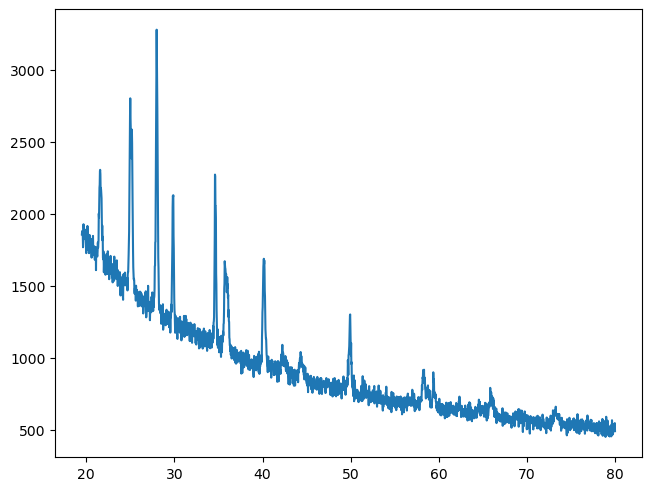

In [41]:
xls = pd.ExcelFile(r'25KI-LiCl-KCl_25oC.xlsx') #read file
sheetX = xls.parse(0) #read sheet 1
plt.plot(sheetX['Angles'],sheetX['Intensities']);

# reading image files into python

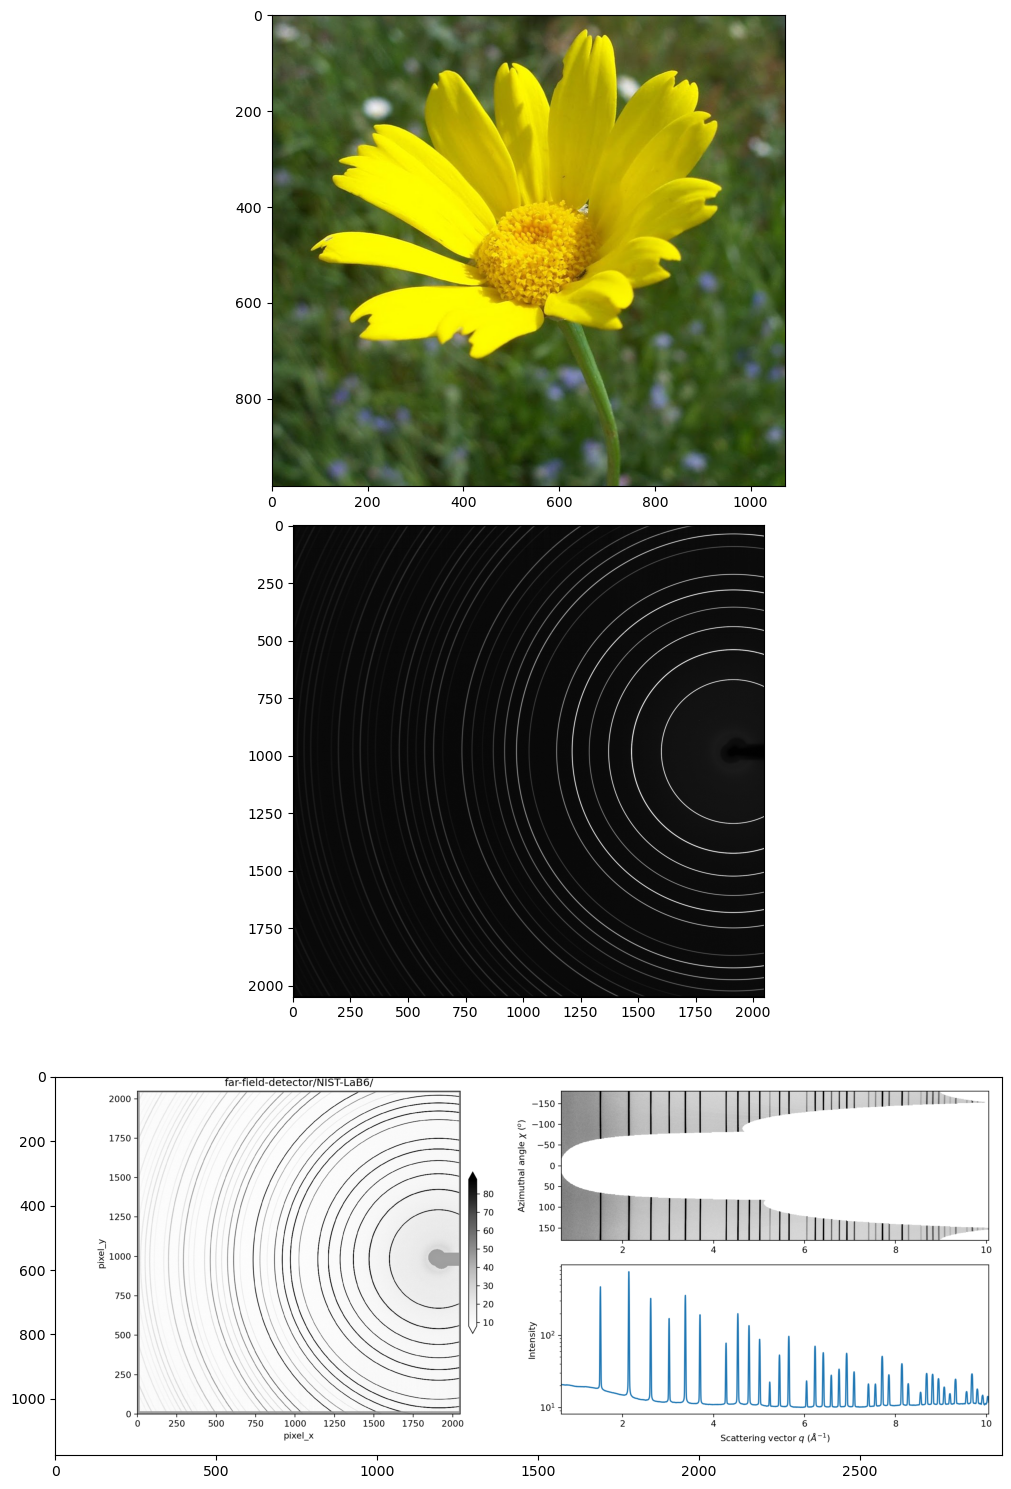

In [43]:
# navigate into image directory
os.chdir('%s/%s/%s'%(here,example_data_path,'image'))

from PIL import Image

# set up plot for images
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(10,15))

# open and display image 1 
im1 = Image.open('flower.jpg')
ax1.imshow(im1)

# open and display image 2
im2 = Image.open('NIST-LaB6.tiff')
ax2.imshow(im2)

# open and display image 3
im3 = Image.open('NIST-LaB6.png')
ax3.imshow(im3);

# reading xarray netCDF files into python

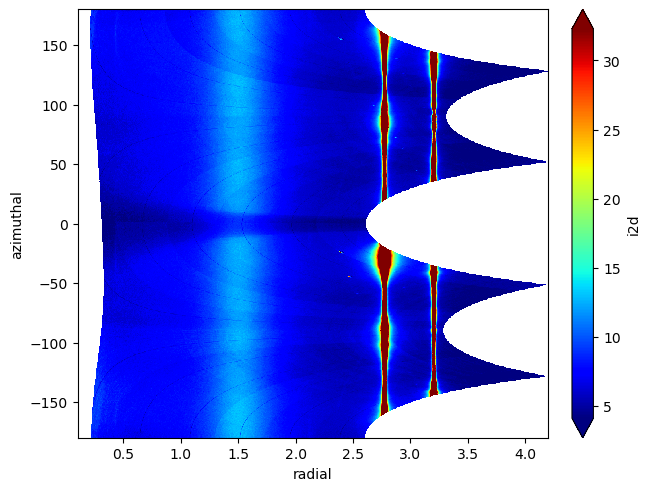

In [45]:
# navigate into plain_text directory
os.chdir('%s/%s/%s'%(here,example_data_path,'netcdf'))

# list the contents of directory
os.listdir()

with xr.open_dataset('Pt-from-28ID-2-D.nc') as ds:
    ds.load()
ds

plt.figure()
ds.i2d.plot(robust=True,cmap='jet');

In [47]:
with xr.open_dataset('Pt-from-28ID-2-D.nc') as ds:
    ds.load();
ds

<xarray.Dataset>
Dimensions:     (radial: 1641, q: 760, azimuthal: 720)
Coordinates:
  * radial      (radial) float64 0.1013 0.1038 0.1063 ... 4.196 4.199 4.201
  * q           (q) float64 2.101 2.104 2.106 2.109 ... 3.991 3.994 3.996 3.999
  * azimuthal   (azimuthal) float64 -179.8 -179.3 -178.8 ... 178.8 179.3 179.8
Data variables:
    Yobs        (q) float64 1.001 1.001 1.001 1.002 ... 1.001 1.003 1.003 1.003
    Ycalc       (q) float64 2.278 2.082 1.902 1.736 ... 4.506 4.777 5.066 5.375
    Ybkg        (q) float64 0.2554 0.2553 0.2551 0.2544 ... 0.1779 0.1789 0.1783
    Ybkg_arpls  (q) float64 0.01164 0.0118 0.01195 ... 0.03517 0.03521 0.03524
    Ybkg_blank  (q) float64 0.2438 0.2435 0.2431 0.2423 ... 0.1427 0.1437 0.1431
    Ybkg_topas  (q) float64 2.187 1.99 1.807 1.639 ... -6.464 -6.34 -6.203
    Yp1         (q) float64 2.187 1.99 1.807 1.639 ... -6.464 -6.34 -6.203
    Yp2         (q) float64 2.278 2.082 1.901 1.735 ... 4.464 4.734 5.023 5.331
    i2d         (azimuthal, radial) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/69)
    user_note:             Platinum RT stationary
    type:                  basic
    uid_dark:              f54aaa88-ef58-4858-90e8-1f6ec182d317
    take_dark:             false
    beam:                  on
    lights:                on
    ...                    ...
    arpls_lam:             10000.0
    arpls_ratio:           0.005
    topas_inp:             \ndo_errors\nxdd topas.xy\n   r_exp 52.9798125 r_e...
    topas_out:             do_errors\nxdd 6XHOSJ7.data.xy\n   r_exp  68.55923...
    y_scale:               0.04093122505610739
    y_baseline:            1

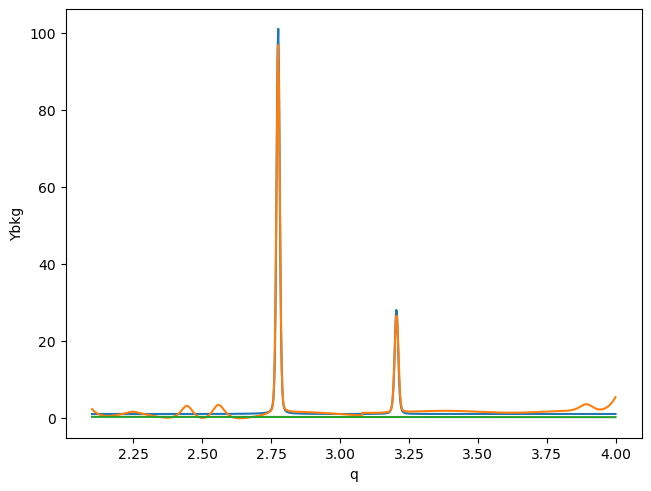

In [49]:
plt.figure()
ds.Yobs.plot()
ds.Ycalc.plot()
ds.Ybkg.plot();

# reading hdf files into python

In [51]:
#navigate to hdf dir
os.chdir('%s/%s/%s'%(here,example_data_path,'hdf'))
os.listdir()
#import hdf library
import h5py 

In [59]:
#opens file in read mode, shows size of embeded dataset and prints contents
f = h5py.File('bde401ed-ac56-45cd-b0c5_000000.h5','r')
print(f.keys())
ds = f['entry']['data']['data']
print(ds)
ds_arr = ds[()]
ds_arr

<KeysViewHDF5 ['entry']>
<HDF5 dataset "data": shape (160, 1, 4096), type "<f8">


array([[[76.20071284, 57.40054146, 41.60040076, ...,  0.        ,
          0.        ,  0.        ]],

       [[80.60078414, 57.80054428, 41.20037208, ...,  0.        ,
          0.        ,  0.        ]],

       [[69.00064268, 59.80060578, 42.80040283, ...,  0.        ,
          0.        ,  0.        ]],

       ...,

       [[69.20059656, 57.40053506, 46.80044281, ...,  0.        ,
          0.        ,  0.        ]],

       [[69.40066421, 58.20056581, 39.80039361, ...,  0.        ,
          0.        ,  0.        ]],

       [[72.20064396, 57.60050586, 42.40037401, ...,  0.        ,
          0.        ,  0.        ]]])

# reading numpy files (npy, npz) into python

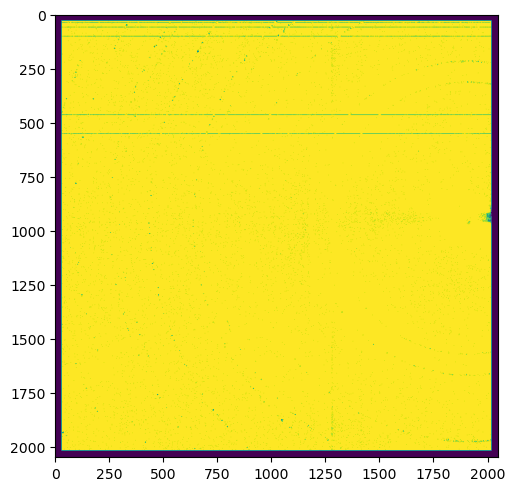

In [61]:
# navigate into npy directory
os.chdir('%s/%s/%s'%(here,example_data_path,'npy'))

file1 = np.load("Ni_calib_20190301-150927_459ff6_0001_mask.npy")
file2 = np.load("feff.npz")

plt.figure()
plt.imshow(file1);

# reading yaml into python

In [63]:
import yaml

# navigate into yaml directory
os.chdir('%s/%s/%s'%(here,example_data_path,'yaml'))

def find_key(data, key):
    if isinstance(data, dict):
        if key in data:
            return data[key]
        else:
            for k, v in data.items():
                result = find_key(v, key)
                if result is not None:
                    return result
    elif isinstance(data, list):
        for item in data:
            result = find_key(item, key)
            if result is not None:
                return result

with open("from_xpdacq.yaml") as stream:
    data_loaded = yaml.safe_load(stream)
    result = find_key(data_loaded,"bt_wavelength")
    print("bt_wavelength =", result)
    

bt_wavelength = 0.1814
